## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [4]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Checking and Missing Values**

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We could see that there are no Null Values.

**Checking the distribution of Classes**

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Percentage distribution
df['Class'].value_counts(normalize = True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Here we will observe the distribution of our classes

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [12]:
normal_share

99.82725143693798

In [13]:
fraud_share

0.1727485630620034

In summary, there exists a problem of Class Imbalance.

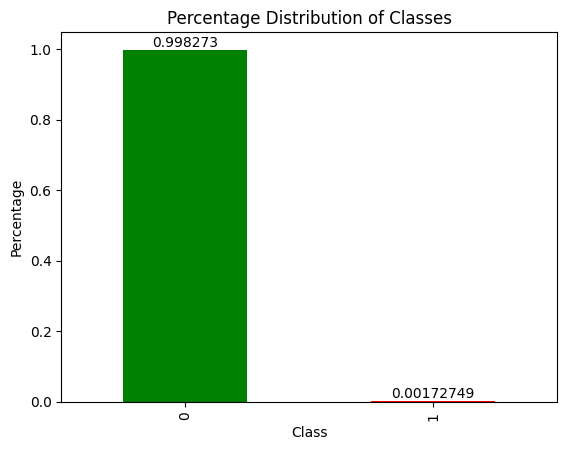

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
ax = df['Class'].value_counts(normalize = True).plot.bar(color = ['g', 'r'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()


**Outlier Treatment** is not needed here since all the columns are already PCA transformed.
[Note: PCA assumes that outlier values are taken care while transforming the dataset.]

In [15]:
# creating fradulant dataframes
data_fraud = df[df['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

In [16]:
# Printing fraud and non_fraud dataframes

print(data_fraud.shape)
print(data_non_fraud.shape)

(492, 31)
(284315, 31)


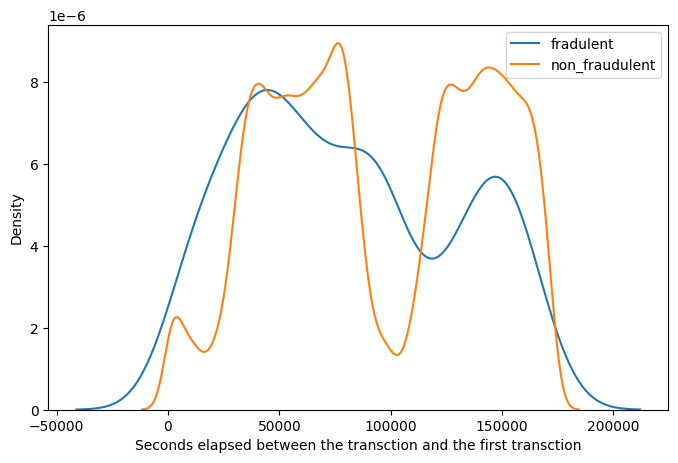

In [17]:
# distribution plot

plt.figure(figsize=(8, 5))
ax = sns.distplot(data_fraud['Time'], label='fradulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non_fraudulent', hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend(loc='best')
plt.show()

****Interpretation-** 


We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. 

Hence, we can drop the Time column.

In [18]:
# dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [19]:
# validating the dataframe
df.shape

(284807, 30)

In [20]:
# Distribution of classes with amount
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

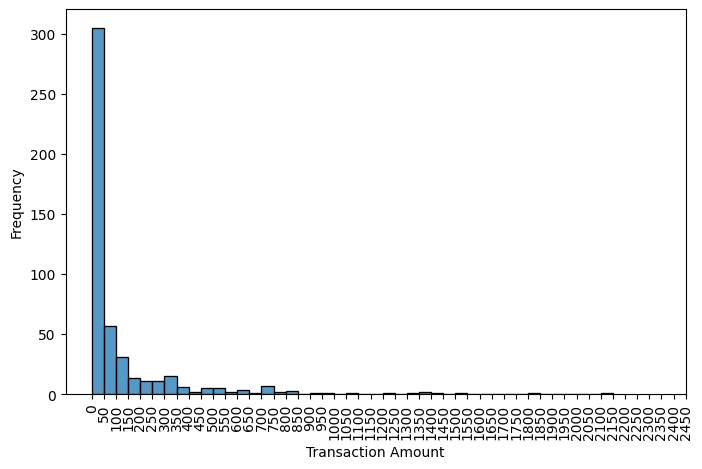

In [21]:
# distribution of Fradulent data

plt.figure(figsize=(8, 5))
sns.histplot(data_fraud['Amount'], binwidth=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(range(0, 2500, 50), rotation=90)
plt.show()

**** Note **** 

We could see here that most of the fradulent transactions are in the range of 0-50 dollars

### Splitting the data into train & test data

In [22]:
# import library
from sklearn.model_selection import train_test_split
# putting all features in X
X = df.drop(['Class'], axis=1)
# assigning target variable to y
y = df['Class']

In [23]:
# validating the X
X.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [24]:
# validating the y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [25]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, stratify=y, random_state=42)

**Feature Scaling**

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [26]:
# importing the library for Standardization
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [27]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,...,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,-0.321082
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,...,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,0.243475
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,...,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,4.797594
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,...,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,-0.331514
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,...,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,-0.331514


**Scaling the test set data**

In [28]:
# transform the test set

X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
186882,-2.537331,1.890864,-0.840555,-1.102759,-2.105725,0.367811,-2.737844,-3.543314,-0.483147,0.112724,...,-1.959611,4.328165,-2.167329,1.022567,-0.241143,-1.094885,-0.475427,-0.177157,-0.082691,-0.201469
165754,-0.250839,1.104108,0.206089,0.417324,1.204079,-0.350694,1.369769,-0.133535,-0.957100,-0.261170,...,-0.128120,0.133048,0.499501,-0.392572,-0.393364,0.233354,-0.490717,0.143897,0.136810,-0.312626
235285,0.568980,-2.520416,-1.114138,1.670652,-1.128945,0.398822,0.190403,0.161493,0.840595,0.099172,...,1.039287,0.318037,-0.760732,-0.181332,0.595866,-0.760920,-1.048927,-0.096970,0.088686,2.416826
101271,1.328892,0.226908,-0.308968,0.381772,0.238490,-0.282946,0.029460,-0.079962,0.227173,-0.267319,...,-0.050933,-0.379270,-1.148959,-0.047403,-1.074464,0.375683,0.182045,-0.031732,0.017501,-0.290023
5832,1.124863,-0.165691,1.337053,1.030033,-0.891116,0.202926,-0.825094,0.163280,2.301808,-0.641129,...,-0.196966,-0.216512,-0.195607,0.072785,0.045625,0.135192,0.308617,0.001142,0.017673,-0.281092


**Checking if there is Skewness in data**

In [29]:
# listing all columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

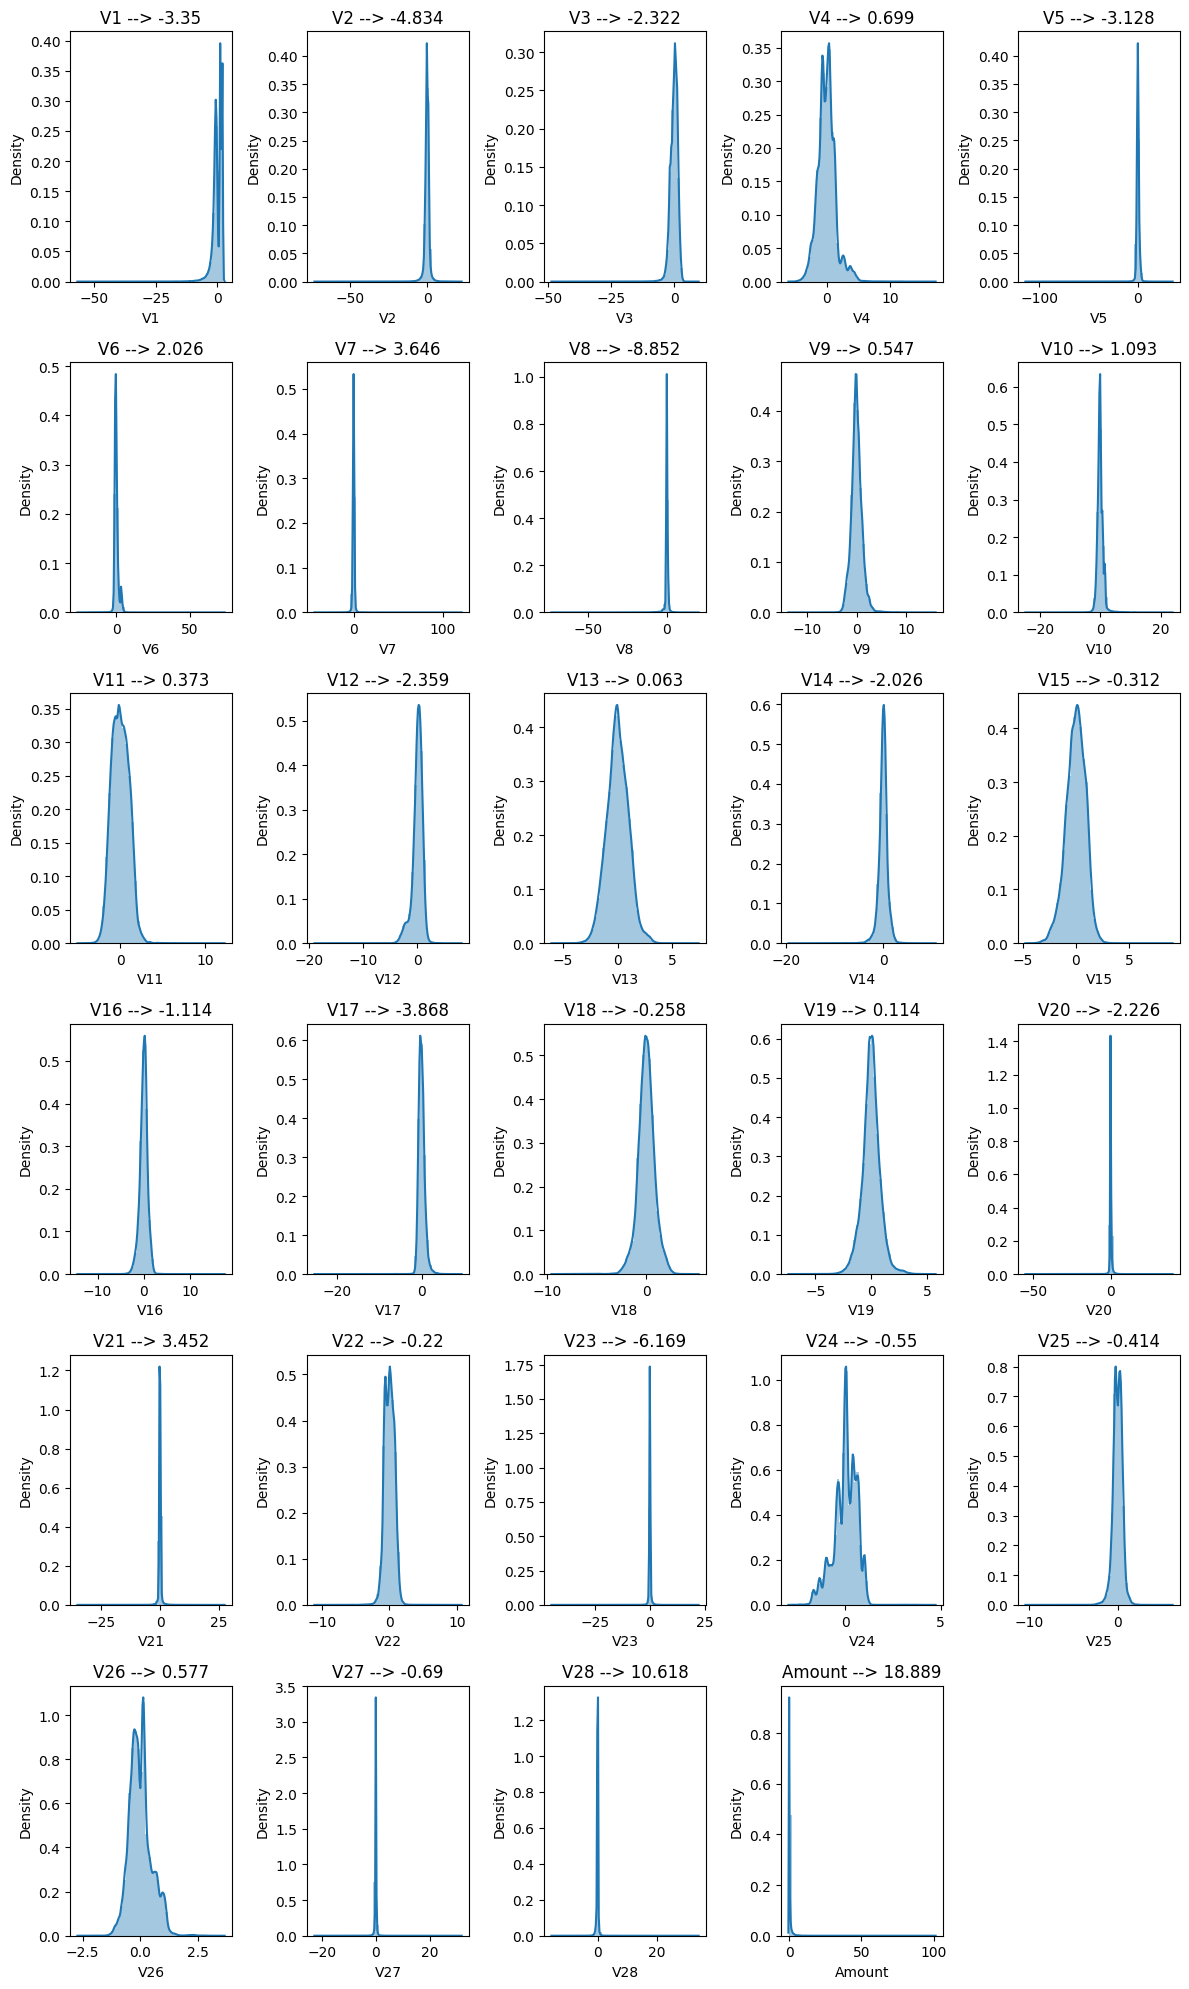

In [30]:
# Plotting the distribution of the variables (skewness) of all the columns

k=0 
plt.figure(figsize=(12, 20))
for col in cols:
  k=k+1
  plt.subplot(6, 5, k)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))

**Note:**

We could clearly see that there are many variables, which are heavily skewed.

Hence, we will be working to mitigate the skewness and transform to them into normal distribution.

**Mitigate skweness with PowerTransformer module**

In [31]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer 

# Instantiate the powertransformer
pow_transform = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pow_transform.fit_transform(X_train)

**Note - The power transform method. Available methods are:**

-‘yeo-johnson’ [1], works with positive and negative values

-‘box-cox’ [2], only works with strictly positive values

We are using ‘yeo-johnson’ in this case.

In [32]:
# Transform the test set
X_test = pow_transform.transform(X_test)

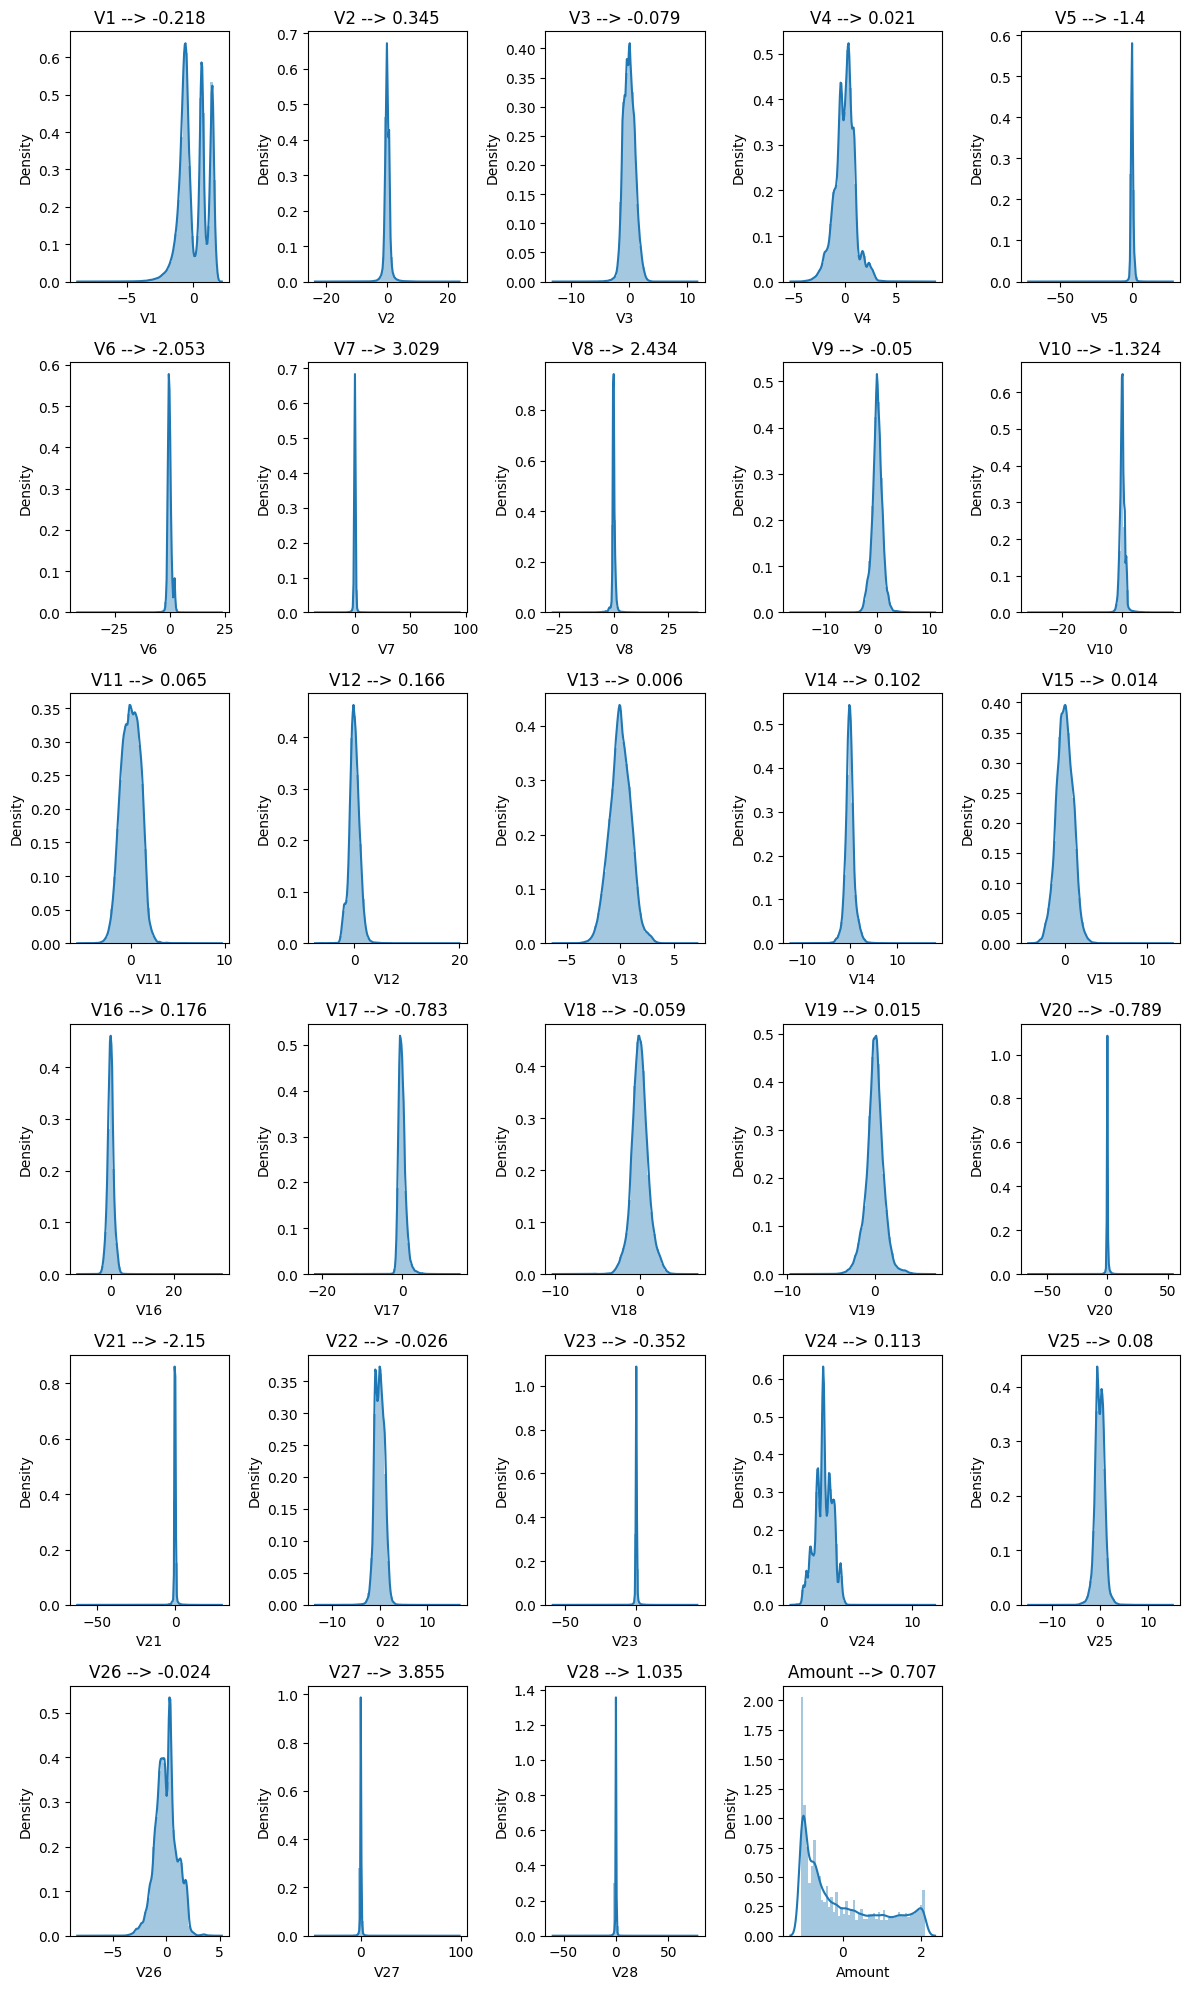

In [33]:
# Now Validating the distribution of the variables (skewness) of all the columns post transformations

k=0 
plt.figure(figsize=(12, 20))
for col in cols:
  k=k+1
  plt.subplot(6, 5, k)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))

Post transformations, we could see that all the variables seem to be normally distributed.

**Model building-**


Here are some Noteworthy points regarding metric selection for heavily imbalanced data:-

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, **we should not consider Accuracy as a good measure for evaluating the model**. Because if the model always predicts the same class (1 or 0) for all the data points, it will result in an accuracy of more than 99%.

Hence, **we have to measure the ROC-AUC score for fair evaluation of the model**.

In other words, accuracy alone may not be a reliable performance metric when dealing with imbalanced datasets. It can be misleading, as it does not capture the model's ability to correctly identify the minority class.

In such scenarios ROC curve is used to understand the strength of the model by evaluating the performance of the model.

Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low.(The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point.)

**After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.**

**Note-**

In the dataset we have 284,807 datapoints and in the case of Oversampling we would have even more number of data points.
SVM is not very efficient with large number of data points beacuse it takes lot of computational power and resources to make the transformation.
When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming.
Hence, because of the unavailablity of the required resources and time, SVM was not tried.

KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points.
It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.


Hence SVM and KNN was not tried.

**Logistic regression**

In [34]:
# importing the logistic regression module
from sklearn.linear_model import LogisticRegression

In [35]:
# importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

**Tuning hyperparameter(C)**

- Regularization is a technique used to prevent overfitting in machine learning models. It adds a penalty term to the loss function, discouraging complex models that fit the training data too closely.
- A smaller value of C corresponds to stronger regularization, meaning the model will be more constrained and have simpler decision boundaries. This can help prevent overfitting but may lead to underfitting if set too low.
- On the other hand, a larger value of tuning hyperparameter C reduces the strength of regularization, allowing the model to fit the training data more closely. This can potentially improve performance on the training set, but it may also increase the risk of overfitting.

In [36]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [37]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, random_state=5, shuffle=True)

# specify params
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = params, 
                        scoring ='roc_auc', 
                        cv=folds, 
                        verbose=1, 
                        return_train_score=True)

In [38]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [39]:
# results of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.674305,0.037720,0.033480,0.003910,0.01,{'C': 0.01},0.979333,0.977614,0.990179,0.974128,...,0.982396,0.006791,1,0.985740,0.988662,0.986382,0.988097,0.985924,0.986961,0.001190
1,0.941431,0.040135,0.030508,0.001582,0.1,{'C': 0.1},0.981369,0.976740,0.988404,0.973751,...,0.981712,0.005939,2,0.985378,0.988031,0.986429,0.987808,0.985547,0.986639,0.001107
2,1.054364,0.085215,0.036805,0.013711,1,{'C': 1},0.981493,0.976406,0.987390,0.973001,...,0.981155,0.005799,3,0.984868,0.987454,0.986074,0.987178,0.985042,0.986123,0.001061
3,1.150710,0.187809,0.030943,0.001507,10,{'C': 10},0.981484,0.976360,0.987267,0.972887,...,0.981080,0.005794,4,0.984798,0.987370,0.986026,0.987087,0.984974,0.986051,0.001053
4,1.091889,0.076999,0.031051,0.001349,100,{'C': 100},0.981482,0.976356,0.987254,0.972866,...,0.981070,0.005795,5,0.984790,0.987362,0.986020,0.987079,0.984965,0.986043,0.001053
5,1.057495,0.023977,0.076804,0.093551,1000,{'C': 1000},0.981480,0.976357,0.987252,0.972867,...,0.981070,0.005794,6,0.984789,0.987361,0.986020,0.987076,0.984964,0.986042,0.001053


In [40]:
cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']]


,params,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,mean_train_score
0,{'C': 0.01},0.982396,0.006791,1,0.674305,0.033480,0.986961
1,{'C': 0.1},0.981712,0.005939,2,0.941431,0.030508,0.986639
2,{'C': 1},0.981155,0.005799,3,1.054364,0.036805,0.986123
3,{'C': 10},0.981080,0.005794,4,1.150710,0.030943,0.986051
4,{'C': 100},0.981070,0.005795,5,1.091889,0.031051,0.986043
5,{'C': 1000},0.981070,0.005794,6,1.057495,0.076804,0.986042


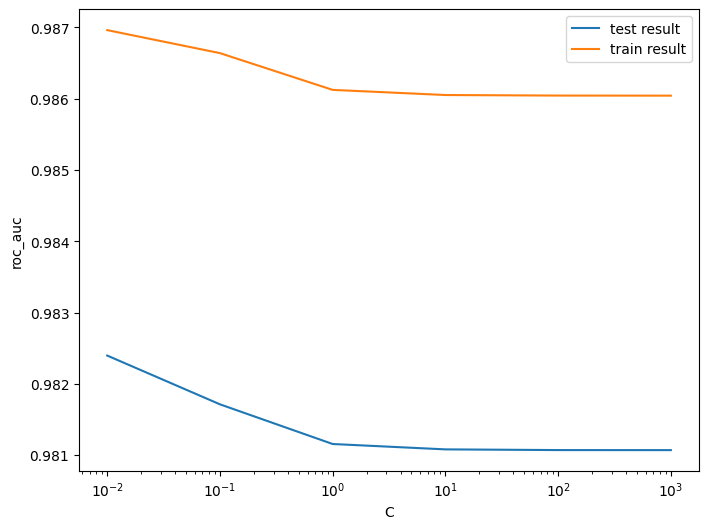

In [41]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper right')
plt.xscale('log')

In [42]:
# best score
best_score = model_cv.best_score_
best_score

0.982396052729514

In [43]:
# best params
best_params = model_cv.best_params_['C']
best_params

0.01

**Note:**

We could see the Best Score is roughly .98 and Best Param is .01


**Logistic regression with optimal C**

In [44]:
# Instantiate the model with best C
logistic_init = LogisticRegression(C=0.01)

# Fit the model on the train set
logistic_init_model = logistic_init.fit(X_train, y_train)

**Prediction on the train set**

In [45]:
# Predictions on the train set
y_train_pred = logistic_init_model.predict(X_train)

In [46]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[198998,     22],
       [   131,    213]])

In [47]:
TN = confusion_matrix[0,0] # True negative
FP = confusion_matrix[0,1] # False positive
FN = confusion_matrix[1,0] # False negative
TP = confusion_matrix[1,1] # True positive

In [48]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9992325595393351
Sensitivity: 0.6191860465116279
Specificity: 0.9998894583458949
F1-score: 0.7357512953367875


In [49]:
# classification_report
print(classification_report(y_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



**ROC on the train set**

In [50]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [51]:
# Predicted probability
y_train_predicted_prob = logistic_init_model.predict_proba(X_train)[:,1]
y_train_predicted_prob

array([0.00014499, 0.00038312, 0.00057989, ..., 0.00048833, 0.00045125,
       0.00026289])

Note - We could see that we achieved ROC score of .99 which is a very good score.

**Prediction on the test set**

In [52]:
# Prediction on the test set
y_test_pred = logistic_init_model.predict(X_test)

In [53]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85281    14]
 [   61    87]]


In [54]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [55]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991222218320986
Sensitivity:- 0.5878378378378378
Specificity:- 0.9998358637669266
F1-Score:- 0.6987951807228916


In [56]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



**ROC on the test set**

In [57]:
# Predicted probability
y_test_predict_prob = logistic_init_model.predict_proba(X_test)[:,1]

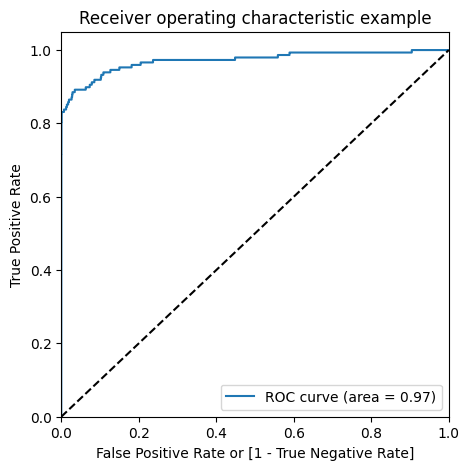

In [58]:
# Plot the ROC curve
draw_roc(y_test, y_test_predict_prob)

Note - We could see here ROC of .97 for test which is a very good score.

**Logistic Regression Model summary -**

**Train set**

* Accuracy = 0.99
* Sensitivity = 0.62
* Specificity = 0.99
* F1-Score = 0.73
* ROC = 0.99

**Test set**

* Accuracy = 0.99
* Sensitivity = 0.59
* Specificity = 0.99
* F1-Score = 0.70
* ROC = 0.97


Overall, the model is performing well in both train and test dataset.

**Model - XGBoost**

In [59]:
# Importing XGBoost
from xgboost import XGBClassifier 

In [60]:
# Hyperparameter tuning with XGBoost

# Creating a KFold object 
folds = 3

# Specifing hyperparameters for xgboost
param_grid = {'learning_rate': [0.2, 0.6],
               'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.456560,0.040826,0.069477,0.001676,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975728,0.982875,0.982445,0.980349,0.003272,1,0.999820,0.999812,0.999490,0.999707,0.000154
1,1.856818,0.577696,0.068661,0.003410,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976916,0.980185,0.975878,0.977660,0.001835,4,0.999969,0.999988,0.999993,0.999984,0.000010
2,1.400967,0.006703,0.067575,0.001147,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.975492,0.979958,0.980696,0.978715,0.002299,2,0.999988,0.999990,0.999994,0.999990,0.000003
3,1.515668,0.041790,0.070725,0.000816,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.957141,0.976121,0.957288,0.963517,0.008913,6,0.999948,0.999987,0.999994,0.999976,0.000020
4,1.523632,0.012958,0.070865,0.000470,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.979536,0.974628,0.981069,0.978411,0.002747,3,1.000000,1.000000,1.000000,1.000000,0.000000
5,1.517790,0.029818,0.070724,0.000336,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.969357,0.984547,0.972027,0.975310,0.006621,5,1.000000,1.000000,1.000000,1.000000,0.000000


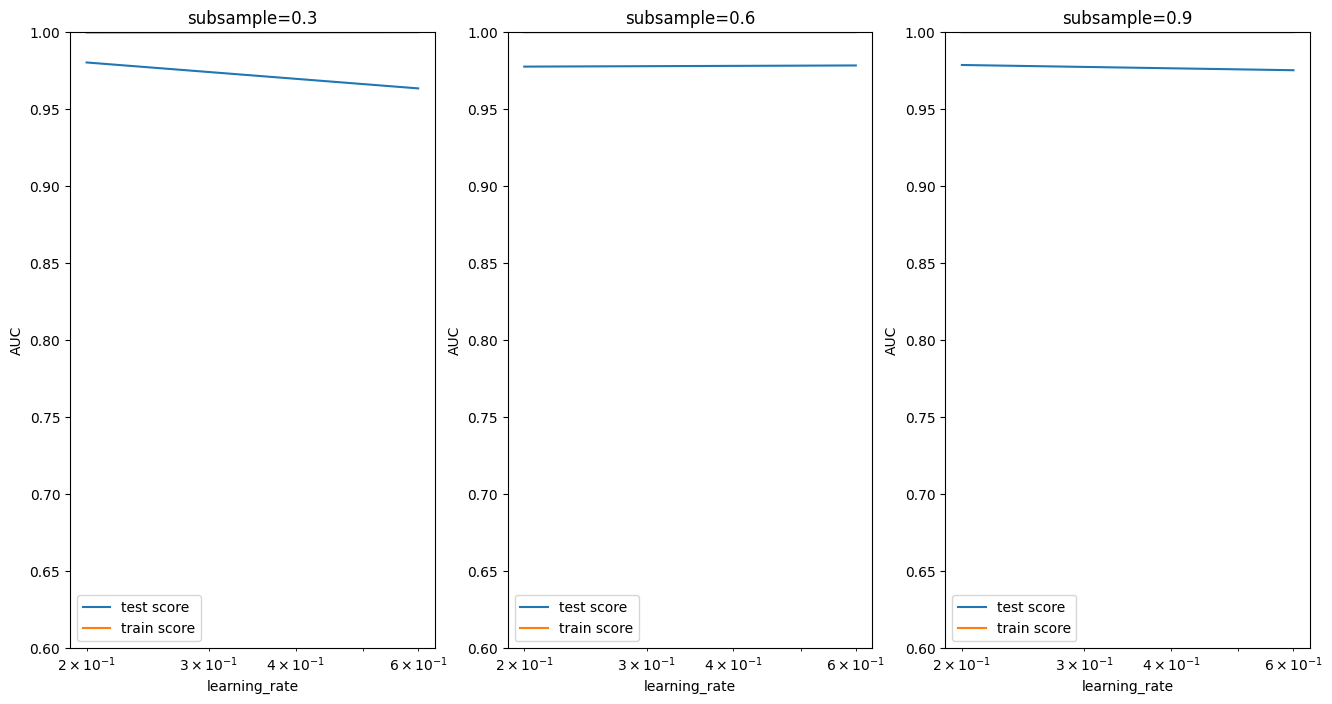

In [62]:
# Plots
plt.figure(figsize=(16,8))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

for n, subsample in enumerate(param_grid['subsample']):
    # subplot
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

In [63]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [64]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we would be needing for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 3, 
          'n_estimators': 100,
          'subsample': 0.3,
         'objective': 'binary:logistic'}

# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

**Prediction on train dataset**

In [65]:
y_train_pred = xgb_model.predict(X_train)

In [66]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[199020      0]
 [     0    344]]


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [69]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [70]:
# Predicted probability
y_train_predicted_probability_xgb = xgb_model.predict_proba(X_train)[:,1]


In [71]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_predicted_probability_xgb)
auc

1.0

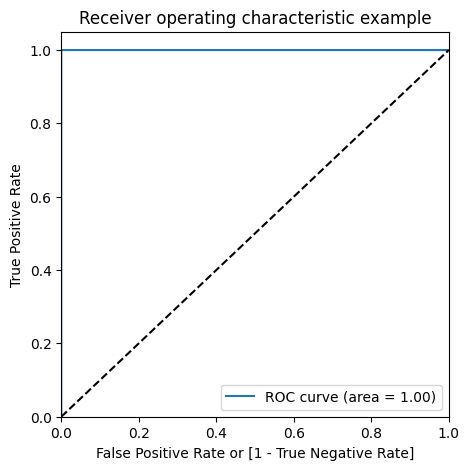

In [72]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_probability_xgb)

**Prediction on the test dataset**

In [73]:
# Predictions on the test set
y_test_pred = xgb_model.predict(X_test)

In [74]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85287     8]
 [   36   112]]


In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994850368081645
Sensitivity:- 0.7567567567567568
Specificity:- 0.9999062078668152
F1-Score:- 0.835820895522388


In [77]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [78]:
# Predicted probability
y_test_predicted_probability_xgb = xgb_model.predict_proba(X_test)[:,1]

In [79]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_predicted_probability_xgb)
auc

0.9685324620593394

**ROC of Test dataset**

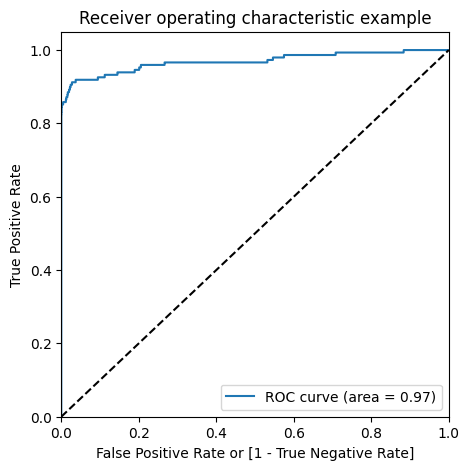

In [80]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_probability_xgb)

**Model summary (xGBoost)-**

**Train dataset:**

* Accuracy = 0.99
* Sensitivity = 0.99
* Specificity = 0.99
* F1-Score = 0.99
* ROC_AUC = 0.99

**Test dataset:**

* Accuracy = 0.99
* Sensitivity = 0.76
* Specificity = 0.99
* F1-Score = 0.84
* ROC_AUC = 0.97

Model is performing really well on both training and test dataset.

**Model: Decision Tree**

In [81]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50)},
             scoring='roc_auc', verbose=1)

In [83]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.693879,0.043330,0.024997,0.000216,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930095,0.945270,0.936123,0.937162,0.006239,12
1,3.653465,0.007977,0.024828,0.000362,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930095,0.945270,0.936123,0.937162,0.006239,12
2,3.689494,0.012742,0.025186,0.000099,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930077,0.945224,0.936014,0.937105,0.006232,14
3,3.660764,0.008976,0.025555,0.000232,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.936631,0.935985,0.936890,0.000864,16
4,3.663869,0.014821,0.025211,0.000226,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.941089,0.935985,0.938376,0.002096,10
5,3.672722,0.006493,0.025409,0.000437,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.936645,0.935985,0.936894,0.000863,15
6,3.658595,0.023266,0.024917,0.000338,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.937971,0.953417,0.935838,0.942409,0.007833,6
7,3.645315,0.022838,0.025469,0.000173,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.937958,0.953417,0.935838,0.942404,0.007835,8
8,3.676431,0.024615,0.025403,0.000389,5,150,150,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.937958,0.953417,0.935847,0.942407,0.007833,7
9,7.042006,0.212822,0.027321,0.000393,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.961023,0.968026,0.906199,0.945083,0.027643,4


In [84]:
grid_search.best_score_

0.9488841222064393

In [85]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=150,
                       min_samples_split=150)


In [86]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=150,
                                  min_samples_split=150)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=150,
                       min_samples_split=150, random_state=100)

**Prediction on the train set**

In [87]:
y_train_pred = dt_imb_model.predict(X_train)

In [88]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198950     70]
 [   100    244]]


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999147288377039
Sensitivity:- 0.7093023255813954
Specificity:- 0.9996482765551201
F1-Score:- 0.7416413373860182


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [91]:
# Classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.78      0.71      0.74       344

    accuracy                           1.00    199364
   macro avg       0.89      0.85      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [92]:
# Predicted probability
y_train_predicted_probability = dt_imb_model.predict_proba(X_train)[:,1]

In [93]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_predicted_probability)
auc

0.9880508167345575

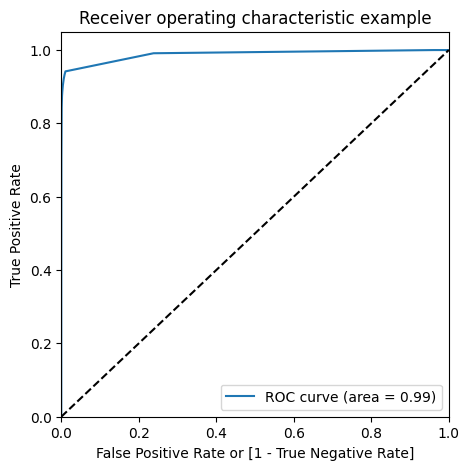

In [94]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_probability)

**Prediction on the test set**

In [95]:
y_test_pred = dt_imb_model.predict(X_test)

In [96]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85252    43]
 [   50    98]]


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989115550718023
Sensitivity:- 0.6621621621621622
Specificity:- 0.9994958672841315
F1-Score:- 0.7416413373860182


In [99]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.66      0.68       148

    accuracy                           1.00     85443
   macro avg       0.85      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [100]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [101]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

0.9268543354304536


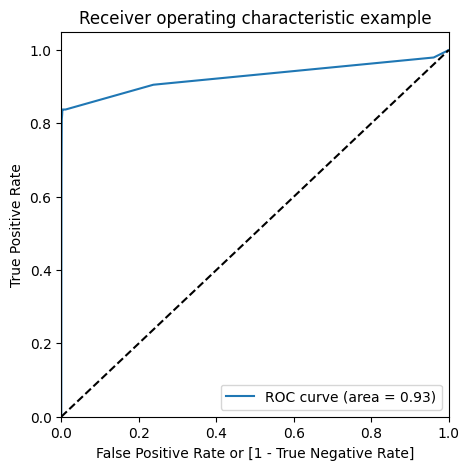

In [102]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Decision Tree - Model summaryDecision Tree**

**Train set**

* Accuracy = 0.99
* Sensitivity = 0.66
* Specificity = 0.99
* F1-Score = 0.74
* ROC-AUC = 0.99

**Test set**

* Accuracy = 0.99
* Sensitivity = 0.71
* Specificity = 0.99
* F1 Score = 0.74
* ROC-AUC = 0.93

**Model - Random forest**

In [103]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [104]:
param_grid = {
    'max_depth': range(5,10,5) ,
    'min_samples_leaf': [50, 100],
    'min_samples_split': [50, 100],
    'n_estimators': [100,200], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [105]:
grid_search.best_score_

0.9992225276378885

In [106]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [107]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                                        max_depth = 5,
                                        max_features = 10,
                                        min_samples_leaf = 50,
                                        min_samples_split = 100,
                                        n_estimators = 200)

In [108]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

**Prediction on the train set**

In [109]:
# predictions on train test
y_train_pred = rfc_imb_model.predict(X_train)

In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198981     39]
 [    89    255]]


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993579583074176
Sensitivity:- 0.7412790697674418
Specificity:- 0.9998040397949954
F1-Score:- 0.799373040752351


In [113]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.87      0.74      0.80       344

    accuracy                           1.00    199364
   macro avg       0.93      0.87      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [114]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [115]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print(auc)

0.9775288010086634


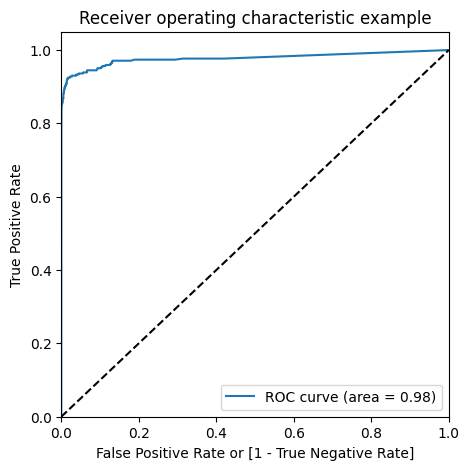

In [116]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Prediction on the test set**

In [117]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [118]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85270    25]
 [   47   101]]


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991573329588147
Sensitivity:- 0.6824324324324325
Specificity:- 0.9997068995837974
F1-Score:- 0.799373040752351


In [121]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.68      0.74       148

    accuracy                           1.00     85443
   macro avg       0.90      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [122]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [123]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

0.959339367505145


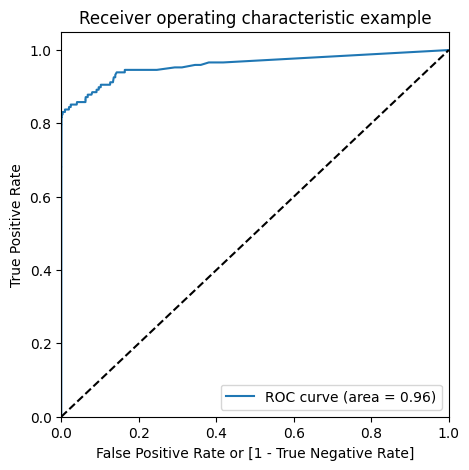

In [124]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Random Forest - Model summary**

**Train set**
* Accuracy = 0.99
* Sensitivity = 0.73
* Specificity = 0.99
* F1-Score = 0.79
* ROC-AUC = 0.98

**Test set**
* Accuracy = 0.99
* Sensitivity = 0.67
* Specificity = 0.99
* F1 Score = 0.79
* ROC-AUC = 0.96

Model is performing well for both train and test dataset.

**Model Selection**

We could see here that among all the models we tried (viz. Logistic, XGBoost, Decision Tree, and Random Forest), almost all the models have performed really well.

More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

We could go for the best as XGBoost which gives us ROC score of 1.0 on the train data and 0.97 on the test data.

**FPR,TPR & best threshold from the roc curve for the best model**

In [125]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_predicted_probability_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predicted_probability_xgb)

threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81545657


**We could see here that with the xgboost model, the threshold is 0.82, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.**

**Handling Class imbalance**
The data is heavily imbalanced, hence we will try several approaches for handling data imbalance.



**Resampling Techniques:**

**Undersampling**: Randomly reduce the majority class instances to match the minority class size.

**Oversampling**: Duplicate or generate synthetic instances of the minority class to match the majority class size.

**SMOTE (Synthetic Minority Over-sampling Technique)**: Create synthetic minority class instances by interpolating between neighboring instances.

**ADASYN (Adaptive Synthetic Sampling)**: Generate synthetic instances in regions where the minority class is difficult to learn.



**Undersampling is not always preferred in industry** because it reduces the size of the majority class, potentially leading to loss of important information and decreased performance on the majority class.

Additionally, undersampling may discard potentially valuable information from the majority class, leading to an incomplete understanding of the problem.

If the dataset is already small, undersampling can further reduce the dataset size, which can lead to overfitting and poor generalization performance of the model.

**SMOTE (Synthetic Minority Oversampling Technique)**

In [126]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [127]:
# instantiate SMOTE
sm = SMOTE(random_state=27)

# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

**We will start with Model building after balancing data with SMOTE.**

**We will start with Model building after balancing data with SMOTE**

In [128]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (199364, 29)
After SMOTE oversampling X_train shape= (398040, 29)


**Logistic Regression (by SMOTE)**

In [129]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [130]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.685175      0.067994         0.056683        0.001427    0.01   
1       1.885818      0.292055         0.060731        0.010800     0.1   
2       1.871770      0.098302         0.056103        0.001661       1   
3       1.851612      0.149425         0.055819        0.001685      10   
4       2.022198      0.288191         0.055622        0.001458     100   
5       1.895014      0.095070         0.058605        0.004443    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.992176           0.992258           0.991855   
1   {'C': 0.1}           0.992294           0.992371           0.991976   
2     {'C': 1}           0.992308           0.992384           0.991988   
3    {'C': 10}           0.992309           0.992385           0.991990   
4   {'C': 100}           0.992309           0.992385           0.991990   
5  {'C': 1000}          

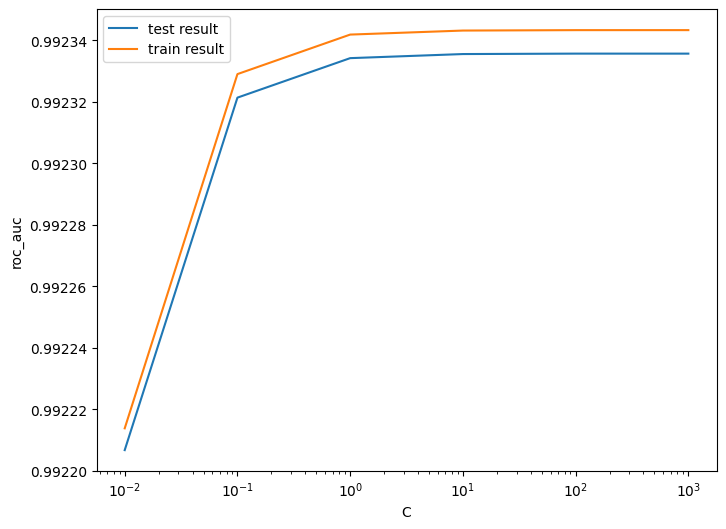

In [131]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [132]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])

0.9923356676986211
100


In [133]:
# Instantiate the model with best C
logistic_model_smote = LogisticRegression(C=100)

In [134]:
# Fit the model on the train dataset
logistic_bal_smote_model = logistic_model_smote.fit(X_train_smote, y_train_smote)

**Prediction on the train set**

In [135]:
# Predictions on the train dataset
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [136]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[194232   4788]
 [ 12078 186942]]


In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9576273741332529
Sensitivity:- 0.9393126318962919
Specificity:- 0.975942116370214


In [139]:
# Classification Report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



In [140]:
# Predicted probability
y_train_predicted_probability_logistic_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

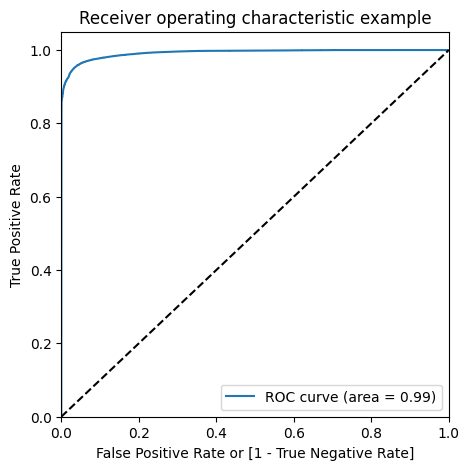

In [141]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_predicted_probability_logistic_smote)

**Prediction on the test set**

In [142]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [143]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[83173  2122]
 [   18   130]]


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9749540629425465
Sensitivity:- 0.8783783783783784
Specificity:- 0.9751216366727241


In [146]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



In [147]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

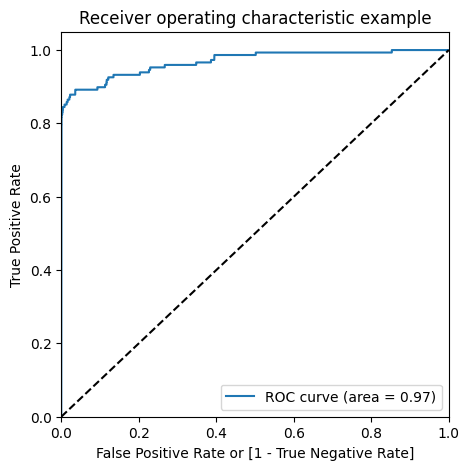

In [148]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Logistic with SMOTE)**

**Train set**

* Accuracy = 0.95
* Sensitivity = 0.94
* Specificity = 0.98
* ROC = 0.99

**Test set**

* Accuracy = 0.97
* Sensitivity = 0.88
* Specificity = 0.98
* ROC = 0.97

**Model - XGBoost(by SMOTE)**

In [149]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [150]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.530233      0.550590         0.139483        0.001072   
1       4.143273      0.012768         0.138496        0.000900   
2       4.190401      0.159321         0.156848        0.028185   
3       4.221797      0.051331         0.137913        0.001403   
4       4.632877      0.568116         0.137015        0.000343   
5       4.131397      0.046762         0.136419        0.001587   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999768   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999756   
2  {'learning_rate': 0.2, 'subsample': 0.9} 

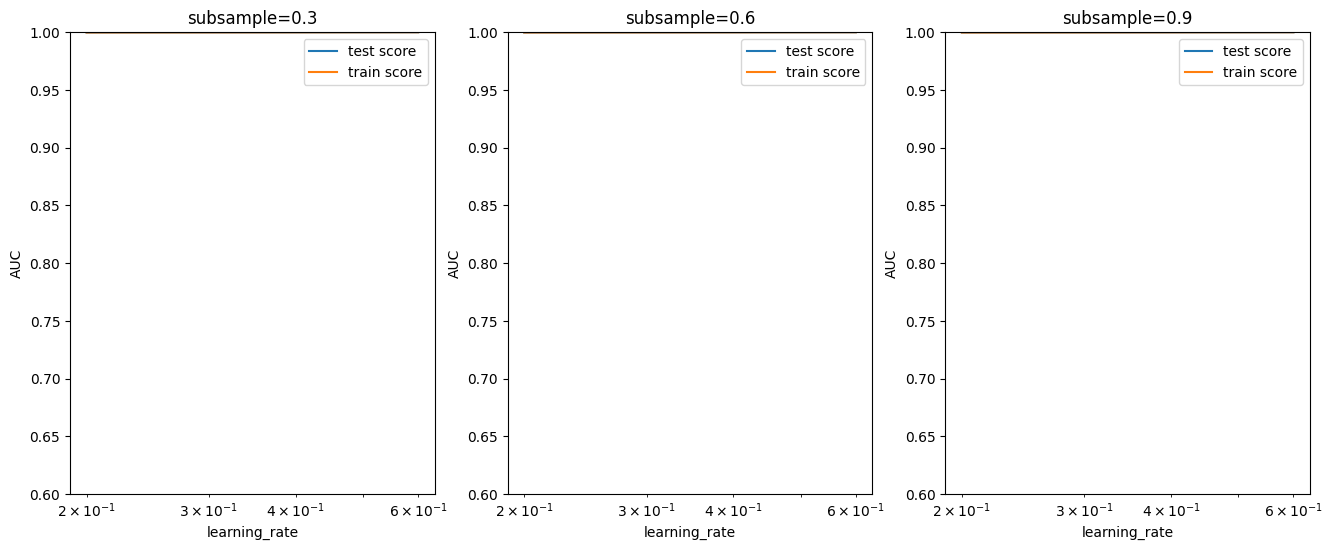

In [151]:
# Plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

**We could see that the train score almost touches to 1**

In [152]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [153]:
# Chosen Hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

**Prediction on the train set**

In [154]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [155]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[199020      0]
 [     0 199020]]


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [158]:
# Classification report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [159]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [160]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print(auc)

1.0


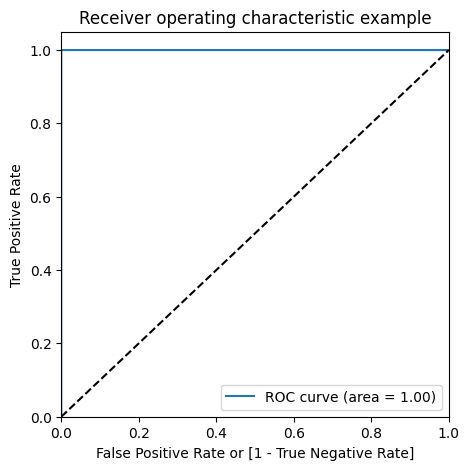

In [161]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [162]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [163]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85255    40]
 [   28   120]]


In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999204147794436
Sensitivity:- 0.8108108108108109
Specificity:- 0.9995310393340758


In [166]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.81      0.78       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [167]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [168]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)


0.9755831510037503


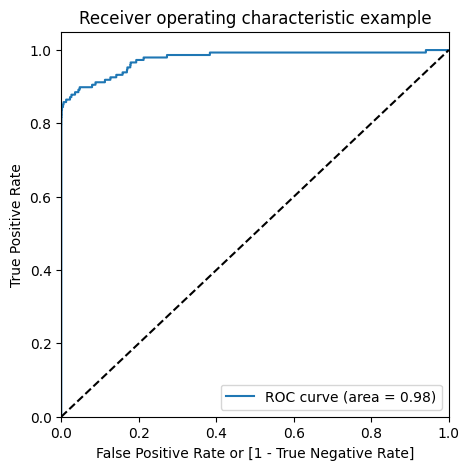

In [169]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (xGBoost SMOTE)**

**Train set**

* Accuracy = 0.99
* Sensitivity = 1.0
* Specificity = 0.99
* ROC-AUC = 1.0

**Test set**

* Accuracy = 0.99
* Sensitivity = 0.82
* Specificity = 0.99
* ROC-AUC = 0.98

**Model - Decision Tree (by SMOTE)**

In [257]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50)},
             scoring='roc_auc', verbose=1)

In [258]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.553144,0.006923,0.052109,0.000155,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991320,0.990893,0.991293,0.991169,0.000196,16
1,7.494415,0.018532,0.051886,0.000376,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991320,0.990893,0.991293,0.991169,0.000196,17
2,7.513677,0.015525,0.052712,0.000369,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991291,0.990836,0.991263,0.991130,0.000208,18
3,7.538147,0.011108,0.051924,0.000207,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991431,0.990942,0.991327,0.991233,0.000210,13
4,7.509415,0.052583,0.052111,0.001165,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991431,0.990942,0.991327,0.991233,0.000210,13
5,7.516321,0.046726,0.051845,0.000856,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991431,0.990942,0.991325,0.991233,0.000210,15
6,7.467388,0.022815,0.051324,0.000203,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.991447,0.990941,0.991321,0.991236,0.000215,10
7,7.551515,0.022806,0.052363,0.000913,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.991443,0.990941,0.991321,0.991235,0.000214,11
8,7.586996,0.056513,0.052070,0.000811,5,150,150,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.991443,0.990941,0.991321,0.991235,0.000214,11
9,13.508674,0.175808,0.055312,0.000160,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998418,0.998404,0.998658,0.998494,0.000116,3


In [259]:
grid_search.best_score_

0.9985122704205082

In [260]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150)

In [174]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=150)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=100)

**Prediction on the train set**

In [175]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [176]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[195563   3457]
 [  1716 197304]]


In [177]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [178]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9870038187116873
Sensitivity:- 0.9913777509798011
Specificity:- 0.9826298864435735


In [179]:
# Classification Report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    199020
           1       0.98      0.99      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



In [180]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [181]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print(auc)

0.9989907871326005


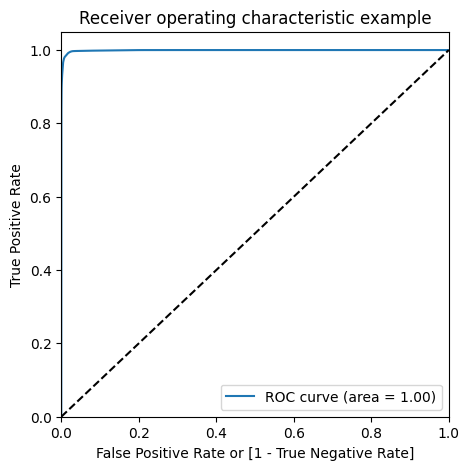

In [182]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [183]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [184]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[83766  1529]
 [   29   119]]


In [185]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [186]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9817656215254614
Sensitivity:- 0.8040540540540541
Specificity:- 0.9820739785450495


In [187]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.80      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.89      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [188]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [189]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

0.8999263684224702


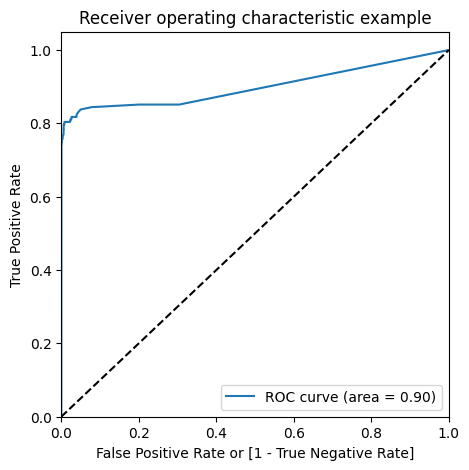

In [190]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Decision Tree(with SMOTE))-**

**Train set**

* Accuracy = 0.98
* Sensitivity = 0.99
* Specificity = 0.98
* ROC-AUC = 1

**Test set**

* Accuracy = 0.98
* Sensitivity = 0.80
* Specificity = 0.98
* ROC-AUC = 0.90

**Model - AdaSyn (Adaptive Synthetic Sampling)**

In [191]:
# importing adasyn
from imblearn.over_sampling import ADASYN

# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [192]:
from collections import Counter

# Before sampling class distribution
print('Class distribution before sampling:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

Class distribution before sampling: Counter({0: 199020, 1: 344})
New class distribution: Counter({1: 199035, 0: 199020})


**Logistic Regression (with Adasyn)**

In [193]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [194]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.404269,0.067727,0.093577,0.001456,0.01,{'C': 0.01},0.971577,0.971037,0.971380,0.971331,0.000223,6,0.971371,0.971379,0.971332,0.971361,0.000021
1,1.579742,0.028938,0.089870,0.000896,0.1,{'C': 0.1},0.971852,0.971298,0.971661,0.971604,0.000230,5,0.971632,0.971645,0.971630,0.971635,0.000007
2,1.628205,0.052479,0.118035,0.035992,1,{'C': 1},0.971872,0.971319,0.971687,0.971626,0.000230,4,0.971652,0.971665,0.971657,0.971658,0.000006
3,1.696476,0.151619,0.090823,0.001932,10,{'C': 10},0.971874,0.971322,0.971689,0.971628,0.000230,3,0.971653,0.971667,0.971660,0.971660,0.000006
4,1.542177,0.044887,0.096187,0.009618,100,{'C': 100},0.971874,0.971322,0.971690,0.971628,0.000230,2,0.971653,0.971667,0.971660,0.971660,0.000006
5,1.613825,0.040976,0.089481,0.001440,1000,{'C': 1000},0.971874,0.971322,0.971690,0.971628,0.000230,1,0.971653,0.971668,0.971660,0.971660,0.000006


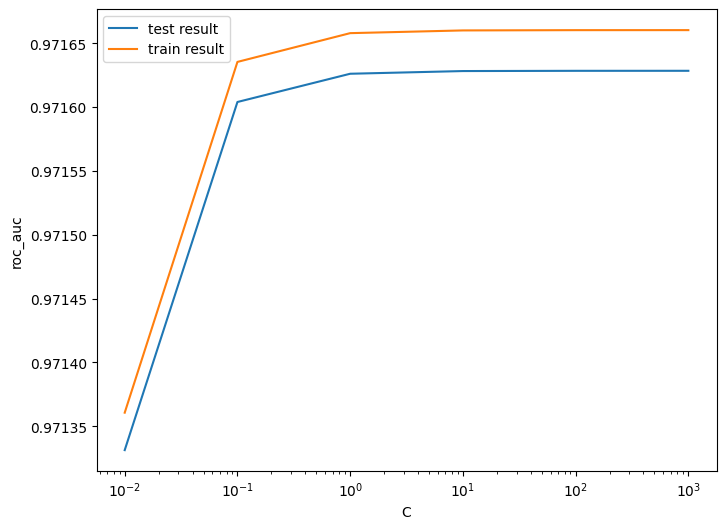

In [195]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [196]:
print(model_cv.best_score_)
print(model_cv.best_params_)

0.9716284004172943
{'C': 1000}


In [197]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [198]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

**Prediction on the train set**

In [199]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [200]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[183427  15593]
 [ 20932 178103]]


In [201]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [202]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))


Accuracy:- 0.9082413234352037
Sensitivity:- 0.8948325671364333
Specificity:- 0.9216510903426791
F1-Score:- 0.9069974104412435


In [203]:
# Classification Report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    199020
           1       0.92      0.89      0.91    199035

    accuracy                           0.91    398055
   macro avg       0.91      0.91      0.91    398055
weighted avg       0.91      0.91      0.91    398055



In [204]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [205]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print(auc)

0.9716572242372835


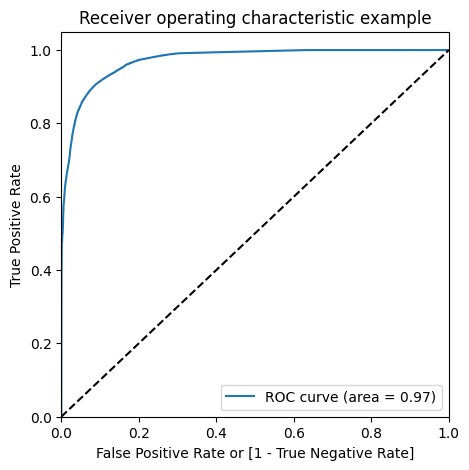

In [206]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [207]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [208]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[78517  6778]
 [   15   133]]


In [209]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [210]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9204967054059432
Sensitivity:- 0.8986486486486487
Specificity:- 0.9205346151591536


In [211]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.90      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443



In [212]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [213]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

0.96877803267832


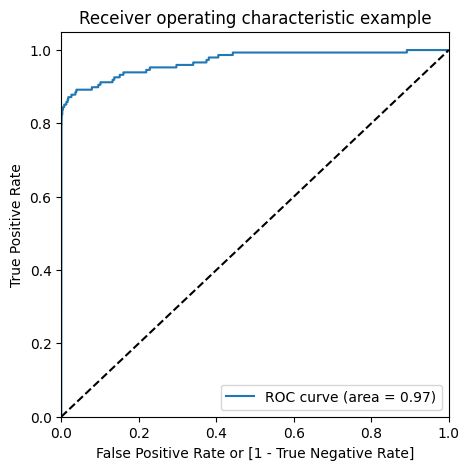

In [214]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Logistic Regression with Adasyn)**

**Train set**

* Accuracy = 0.91
* Sensitivity = 0.89
* Specificity = 0.92
* ROC = 0.97

**Test set**

* Accuracy = 0.92
* Sensitivity = 0.90
* Specificity = 0.92
* ROC = 0.97

**Model- XGBoost (with Adasyn)**

In [215]:
# Hyperparameter tuning with XGBoost

# Creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [216]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.441620,0.544529,0.145735,0.003967,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.993069,0.973895,0.982416,0.983126,0.007844,6,0.999345,0.999395,0.999451,0.999397,0.000044
1,4.021168,0.017279,0.139870,0.002049,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.992996,0.978796,0.983006,0.984933,0.005955,3,0.999376,0.999457,0.999469,0.999434,0.000041
2,4.357248,0.549409,0.140806,0.002194,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.991209,0.979109,0.982608,0.984309,0.005084,5,0.999230,0.999392,0.999476,0.999366,0.000102
3,4.157830,0.061148,0.140569,0.001885,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.993245,0.983393,0.986213,0.987617,0.004143,1,0.999956,0.999964,0.999961,0.999960,0.000003
4,4.129677,0.037876,0.141972,0.002592,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.988765,0.981977,0.983889,0.984877,0.002858,4,0.999955,0.999967,0.999968,0.999963,0.000006
5,4.476937,0.597275,0.140785,0.001209,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.991954,0.977904,0.989933,0.986597,0.006202,2,0.999961,0.999968,0.999975,0.999968,0.000006


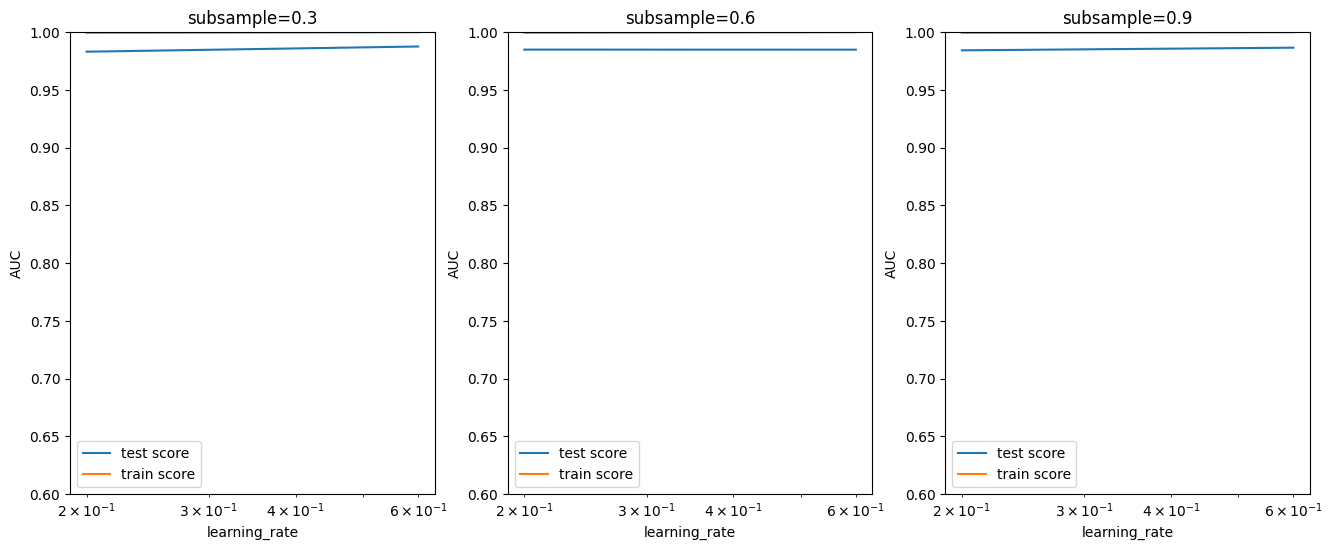

In [217]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log') 

In [218]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [219]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

**Prediction on the train set**

In [220]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [221]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[199020      0]
 [     0 199035]]


In [222]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [223]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [224]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199035

    accuracy                           1.00    398055
   macro avg       1.00      1.00      1.00    398055
weighted avg       1.00      1.00      1.00    398055



In [225]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]


In [226]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print(auc)

1.0


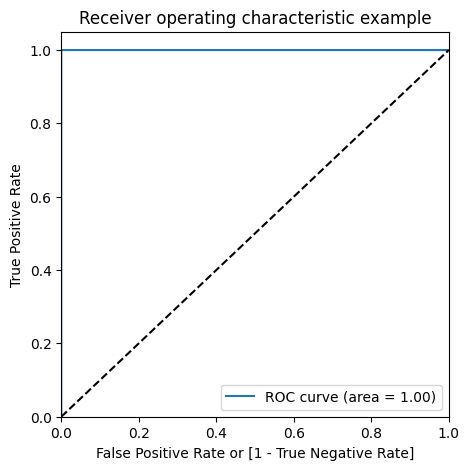

In [227]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [228]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [229]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[85253    42]
 [   28   120]]


In [230]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9991807403766253
Sensitivity:- 0.8108108108108109
Specificity:- 0.9995075913007796


In [232]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.81      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [233]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [234]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

0.9701725173206504


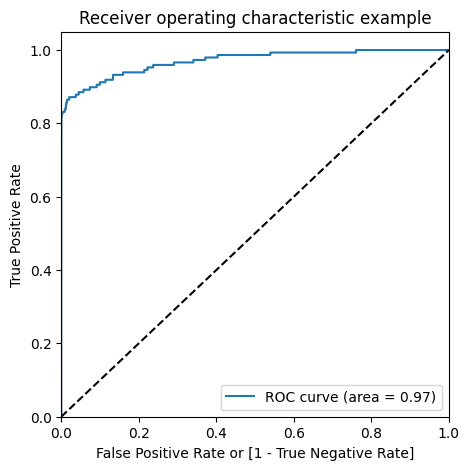

In [235]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (xGBoost with Adasyn)**

**Train set**

* Accuracy = 1
* Sensitivity = 1
* Specificity = 1
* ROC-AUC = 1

**Test set**

* Accuracy = 0.99
* Sensitivity = 0.80
* Specificity = 0.99
* ROC-AUC = 0.97

**Model - Decision Tree (with Adasyn)**

In [236]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [237]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.370528      0.058154         0.052375        0.000709   
1       7.364205      0.068047         0.052651        0.000860   
2       7.351305      0.064078         0.052643        0.000766   
3       7.370510      0.063224         0.052638        0.000290   
4      11.853010      0.401048         0.054079        0.002903   
5      11.824856      0.364467         0.052537        0.001042   
6      11.838342      0.371905         0.052735        0.000493   
7      11.829737      0.384323         0.053048        0.000541   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                

In [238]:
grid_search.best_score_

0.9349771677966326

In [239]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

In [240]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

**Prediction on the train set**

In [241]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [242]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[191468   7552]
 [  1262 197773]]


In [243]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [244]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9778573312733165
Sensitivity:- 0.9936594066370237
Specificity:- 0.9620540649180986


In [245]:
# Classification Report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    199020
           1       0.96      0.99      0.98    199035

    accuracy                           0.98    398055
   macro avg       0.98      0.98      0.98    398055
weighted avg       0.98      0.98      0.98    398055



In [246]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [247]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print(auc)

0.9930926085006726


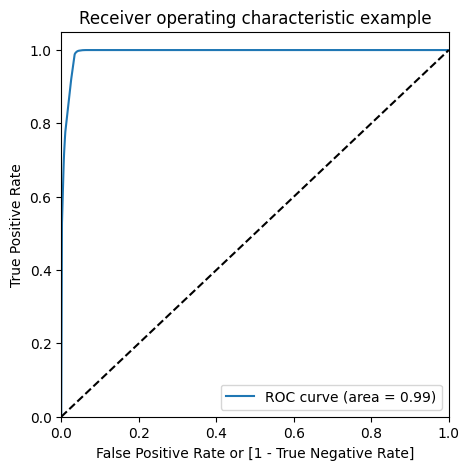

In [248]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [249]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [250]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[81971  3324]
 [   23   125]]


In [251]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [252]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9608276862937865
Sensitivity:- 0.8445945945945946
Specificity:- 0.9610293686617035


In [253]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.84      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [254]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [255]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

0.9273597752157456


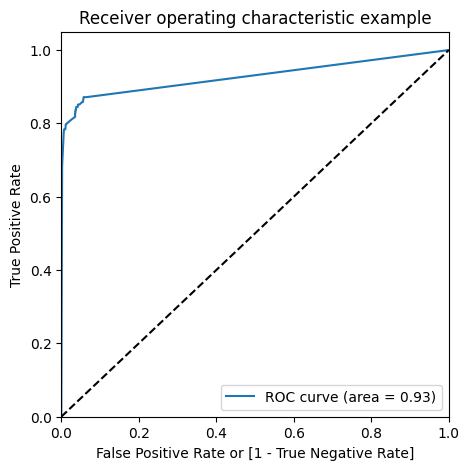

In [256]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Decision Tree with Adasyn)**

**Train set**

* Accuracy = 0.97
* Sensitivity = 0.99
* Specificity = 0.95
* ROC-AUC = 0.99

**Test set**

* Accuracy = 0.96
* Sensitivity = 0.84
* Specificity = 0.96
* ROC-AUC = 0.93

**Choosing the best model on the balanced data**

Here we have balanced the data with two of the best approaches we have:
* SMOTE 
* Adasyn

With every data balancing technique, we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

SMOTE and Adasyn models performed well. 
Among those models, the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set.

We can consider the Logistic model as the best model to choose because:
* the easy interpretation of the model
* the resourse requirements to build the logistic regression model is lesser than the other heavy models such as Random forest or XGBoost.

**Hence, we could conclude that the Logistic regression model with SMOTE is the best model for its simplicity and less resource requirement.**

**Print the FPR,TPR & select the best threshold from the roc curve for the best model**

In [262]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_predicted_probability_logistic_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_predicted_probability_logistic_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9923384006059397
Threshold= 0.40148555215255277


We could see here that the **threshold is 0.40** for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

In [ ]:
Print the FPR,TPR & select the best threshold from the roc curve for the best model

**Cost benefit analysis**

We have tried several models till now with both balanced and imbalanced data. 

We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.
But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not.

For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure, the cost of deploying the model increases. 

On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss or gain the bank get.
If the amount is huge then we have to consider building the complex model even though the cost of building the model is high.

**Summary to the business**

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. 

For every transaction that is flagged as fraudulent, we could add the human element to verify whether the transaction was done by calling the customer. 

However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if a model has low recall, it means that it is failing to detect a significant number of actual fraudulent transactions (false negatives).

So we have to consider the losses if the transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

**After performing several models, we have seen that in the balanced dataset with SMOTE technique, the Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.**